In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

In [2]:
import opsimsummary as oss

In [3]:
from opsimsummary import OpSimOutput, HealpixTiles

In [4]:
import healpy as hp

In [5]:
import numpy as np

In [6]:
import pandas as pd
from sqlalchemy import create_engine

In [7]:
import os

In [36]:
hptest = os.path.join(os.path.split(oss.__file__)[0], 'example_data', 'healpixels_micro.db')
opsimtest = os.path.join(os.path.split(oss.__file__)[0], 'example_data', 'enigma_1189_micro.db')

In [9]:
opsout = OpSimOutput.fromOpSimDB(opsimtest)

 reading from database sqlite:////Users/rbiswas/.local/lib/python2.7/site-packages/opsimsummary/example_data/enigma_1189_micro.db
SELECT * FROM Summary WHERE PROPID in (366, 364)


/Users/rbiswas/soft/LSST/DarwinX86/miniconda2/4.2.12.lsst1/lib/python2.7/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
ra_fields = opsout.summary.ditheredRA
dec_fields = opsout.summary.ditheredDec

In [37]:
hpt = HealpixTiles(nside=128, preComputedMap=hptest)

In [12]:
hpt_ball = HealpixTiles(nside=128, opsimdf=opsout.summary)

In [13]:
theta, phi = oss.convertToSphericalCoordinates(ra=54., dec=-27.5)
ipixval = hp.ang2pix(128, theta[0], phi[0], nest=True)

In [14]:
ipixval

144424

In [15]:
np.degrees([0.925184, -0.4789])

array([ 53.00913847, -27.43894881])

In [ ]:
# Check that the maximal pointings make sense

In [43]:
set(np.sort(hpt_ball.pointingTree.pointingsEnclosing(54., -27.5, 0.)[0])) -  set(np.sort(hpt_ball.pointingSequenceForTile(ipixval)[0]))

set()

In [50]:
np.radians([54., -27.5])

array([ 0.9424778 , -0.47996554])

In [16]:
 set(np.sort(hpt_ball.pointingSequenceForTile(ipixval)[0])) - set(np.sort(hpt_ball.pointingTree.pointingsEnclosing(54., -27.5, 0.)[0])) 

{191652,
 191684,
 193483,
 193514,
 196390,
 203315,
 204155,
 204200,
 206908,
 206911,
 212016,
 212035,
 212835,
 212837,
 212839,
 212841,
 212843,
 212845,
 212847,
 212849,
 212851,
 212853,
 213818,
 213863,
 213871,
 213895,
 217136,
 217165,
 223826,
 223846,
 223868,
 223870,
 223872,
 223874,
 223876,
 223878,
 223880,
 223882,
 223884,
 223886,
 223888,
 223890,
 223892,
 223922}

In [59]:
hpt_ball.pointingTree.pointingsEnclosing(54., -27.5, 0.)[0].size

1230

In [17]:
hpt_ball.opsimdf.loc[hpt_ball.pointingTree.pointingsEnclosing(54., -27.5, 0.)[0]][['fieldID', 'fieldRA', 'fieldDec']].drop_duplicates()

,fieldID,fieldRA,fieldDec
obsHistID,,,
191578,1427,0.925184,-0.47890
238641,1419,0.979097,-0.48666
176071,1546,0.958381,-0.43440


In [57]:
hpt_ball.opsimdf[hpt_ball.opsimdf.overlap].fieldID.size

1230

# Scratch

#### Brute Force Calculcation of distances

In [49]:
vecs = hp.ang2vec(theta, phi)
center_ang = np.array([np.radians(theta_degrees), np.radians(phi_degrees)])
center_vec = hp.ang2vec(center_ang[0], center_ang[1])

In [50]:
dists = np.arccos(np.dot(vecs, center_vec))

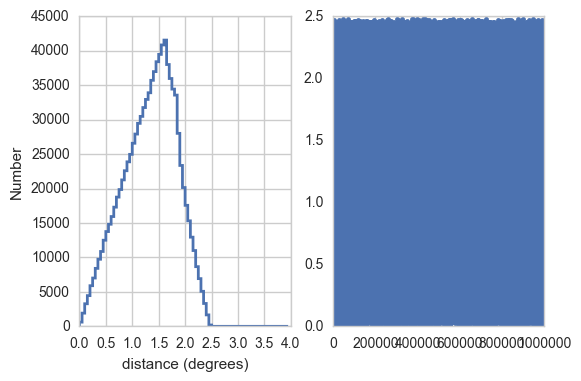

In [51]:
fig, axx = plt.subplots(1, 2)
ax = axx[0]
ay = axx[1]
_ = ax.hist(np.degrees(dists), bins=np.arange(0., 4., 0.05),
            histtype='step', lw=2, alpha=1)
#ax.axvline(1.85)
ax.set_xlabel('distance (degrees)')
ax.set_ylabel('Number')
ay.plot(np.degrees(dists), '.')

####  Ball Tree Usage

In [64]:
tree = BallTree(X, leaf_size=49, metric='haversine')

In [53]:
ra_center = np.radians(phi_degrees)
dec_center = -np.radians(theta_degrees) + np.pi/2.

In [65]:
dist_vals_q, inds = tree.query([dec_center, ra_center], k=1000)

/usr/local/miniconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [66]:
inds, dist_vals = tree.query_radius([dec_center, ra_center], r=np.radians(1.4), count_only=False, 
                                    return_distance=True)

/usr/local/miniconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [74]:
opsout.summary.loc[237805]

sessionID                1189
propID                    366
fieldID                   744
fieldRA                     0
fieldDec            -0.794553
filter                      z
expDate              27311530
expMJD                49669.1
night                     316
visitTime                  34
visitExpTime               30
finRank               9.73809
finSeeing            0.802069
transparency                0
airmass               1.07843
vSkyBright            19.6239
filtSkyBrightness      18.062
rotSkyPos             6.00103
lst                  0.339244
altitude              1.18707
azimuth               3.81351
dist2Moon             0.83442
solarElong            103.115
moonRA                6.14855
moonDec              0.031281
moonAlt              0.859187
moonAZ                5.50998
moonPhase             77.2654
sunAlt               -0.61158
sunAz                 3.73199
phaseAngle            56.9543
rScatter               346163
mieScatter            90111.8
moonIllum 

In [68]:
dist_vals.shape

(1,)

In [69]:
dist_vals[0]

array([ 0.02441608,  0.02437569,  0.02436604, ...,  0.02442384,
        0.02442937,  0.0244332 ])

In [70]:
inds

array([array([106943, 354299, 528913, ..., 336257, 853764, 925247])], dtype=object)

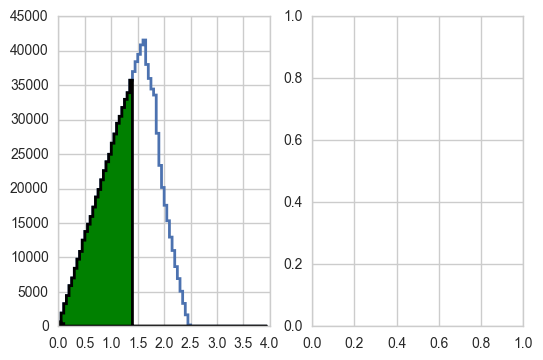

In [57]:
fig, axx = plt.subplots(1, 2)
ax = axx[0]
ay = axx[1]
_ = ax.hist(np.degrees(dists), bins=np.arange(0., 4., 0.05),
            histtype='step', lw=2, alpha=1)
#_ = ax.hist(dist_vals[0], bins=np.arange(0., 4., 0.05),
#            histtype='stepfilled')

_ = ax.hist(np.degrees(dist_vals[0]), bins=np.arange(0., 4., 0.05), histtype='stepfilled', color='g',
            lw=2, alpha=1)
_ = ax.hist(np.degrees(dist_vals_q[0]), bins=np.arange(0., 4., 0.05), histtype='stepfilled', color='r',
            lw=2, alpha=1)





In [58]:
dist_vals

array([ array([ 0.02441608,  0.02437569,  0.02436604, ...,  0.02442384,
        0.02442937,  0.0244332 ])], dtype=object)

## Dual Trees

In [127]:
rng = np.random.RandomState(1)
rvals = hpt.samplePatchOnSphere(phi=phi_degrees, theta=theta_degrees, delta=1.85, size=10000, rng=rng,
                                degrees=True)

In [ ]:
inds, dist_vals = tree.query_radius([dec_center, ra_center], r=np.radians(1.4), count_only=False, 
                                    return_distance=True)

# Scratch

In [61]:
np.radians(2.5)

0.043633231299858237

In [62]:
len(dists)

1000000

In [63]:
angs = np.zeros(shape=(len(theta), 2))
angs[:, 0] = ra
angs[:, 1] = phi

NameError: name 'ra' is not defined

In [19]:
np.shape(angs)

(786432, 2)

In [34]:
tree = BallTree(angs, leaf_size=200, metric='haversine')

In [46]:
tree.valid_metrics

['chebyshev',
 'sokalmichener',
 'canberra',
 'haversine',
 'rogerstanimoto',
 'matching',
 'dice',
 'euclidean',
 'braycurtis',
 'russellrao',
 'cityblock',
 'manhattan',
 'infinity',
 'jaccard',
 'seuclidean',
 'sokalsneath',
 'kulsinski',
 'minkowski',
 'mahalanobis',
 'p',
 'l2',
 'hamming',
 'l1',
 'wminkowski',
 'pyfunc']

In [36]:
r = tree.query_radius([[0., 0.]], r= 1.75  )

In [38]:
tree.query()

array([array([262144, 262147, 262156, ..., 265465, 262969, 265253])], dtype=object)

In [ ]:
from opsimsummary

In [4]:
opsout.summary.fieldID.max()

2776

In [5]:
opsout.summary.propID.unique()

array([54])

In [7]:
94608000 / 60. / 60. / 24. / 365.

3.0

In [10]:
callable(np.sin)

True

In [9]:
import numpy as np

In [11]:
import analyzeSN

In [12]:
import os

In [13]:
opsimDB = '/Users/rbiswas/data/LSST/OpSimData/minion_1016_sqlite.db'

In [14]:
from opsimsummary import OpSimOutput

In [15]:
opsout = OpSimOutput.fromOpSimDB(opsimDB, subset='wfd')

 reading from database sqlite:////Users/rbiswas/data/LSST/OpSimData/minion_1016_sqlite.db
SELECT * FROM Summary WHERE PROPID in (54)


In [59]:
angs = opsout.summary[['ditheredRA', 'ditheredDec']].values

In [18]:
dithers = np.random.normal(0., np.radians(1.75) / 10., size=2*len(angs)).reshape(len(angs), 2)

In [19]:
print(np.shape(angs), np.shape(dithers))

((2083758, 2), (2083758, 2))


In [20]:
angs += dithers

In [21]:
angs

array([[ 1.64296148, -1.11162568],
       [ 2.40356574, -0.63314844],
       [ 2.34580619, -0.63043314],
       ..., 
       [ 0.04062848, -0.35833293],
       [ 5.92124975, -0.4702836 ],
       [ 3.62077156, -0.43463119]])

In [22]:
from scipy.spatial import KDTree

In [24]:
from opsimsummary import convertToSphericalCoordinates

In [31]:
theta, phi = convertToSphericalCoordinates(angs[:, 0], angs[:, 1], unit='radians')
vecs = hp.ang2vec(theta, phi)

In [26]:
import healpy as hp

In [32]:
tree= KDTree(vecs, 100)

In [ ]:
tree.query_ball_point()

In [37]:
theta = np.arange(0., np.radians(1.75), np.radians(1.75)/1000.)

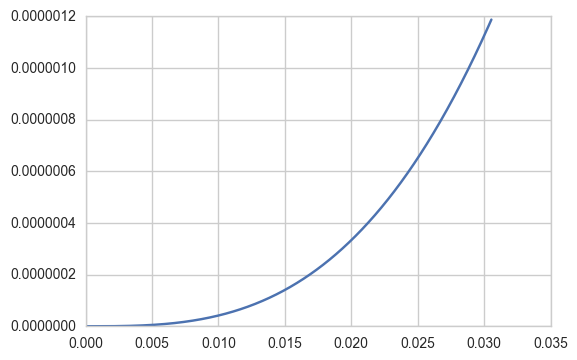

In [39]:
fig, ax = plt.subplots()
ax.plot(theta, theta - 2.0 * np.sin(theta/2.0))

In [124]:
phi = np.radians(phi)
theta = np.radians(theta)

In [113]:
theta.min()

0.49131486302991795

In [127]:
vec = hp.ang2vec(theta, phi)

In [126]:
X

array([[ 0.52675101, -0.4957897 ],
       [ 0.5374951 , -0.45915738],
       [ 0.53023494, -0.47254315],
       ..., 
       [ 0.54028743, -0.47624068],
       [ 0.49284631, -0.47068543],
       [ 0.54384857, -0.48783842]])

In [128]:
X = hp.vec2ang(vec)


In [129]:
center_vec = hp.ang2vec(np.radians(117.5), np.radians(30.))

In [73]:
np.shape(center_vec[:, np.newaxis])

(3, 1)

In [74]:
np.shape(vec[:, np.newaxis])

(10000, 1, 3)

In [103]:
dists = np.dot( vec, center_vec)

In [140]:
tree = BallTree(X, leaf_size=40, metric='haversine')

In [141]:
tree.query([[np.radians(-27.5), np.radians(30.)]], 2)

(array([[  8.68925654e-05,   1.57157316e-04]]), array([[ 121, 7196]]))

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt

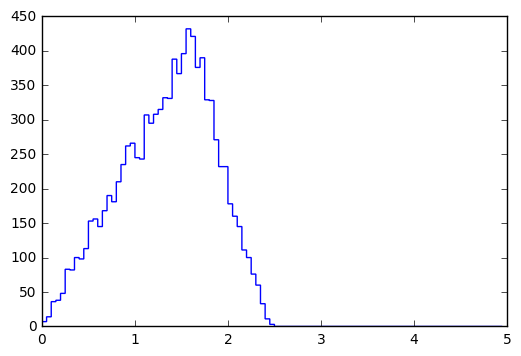

In [138]:
fig, ax = plt.subplots()
_ = ax.hist(np.degrees(dists), np.arange(0., 5., 0.05), histtype='step')

In [106]:
dists.min()

0.99907333283147137

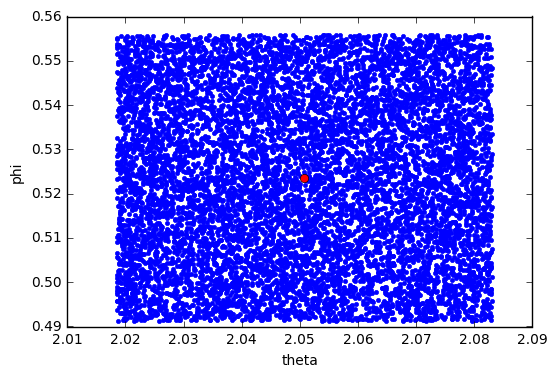

In [125]:
fig, ax = plt.subplots()
ax.plot(theta, phi, '.')
ax.plot(np.radians(117.5), np.radians(30.), 'ro')
ax.set_xlabel('theta')
ax.set_ylabel('phi')

In [134]:
dists = np.arccos(np.dot(vec, center_vec))

In [143]:
dists[7196]

0.00015715731546150899

In [30]:
d = 23 * 60.0 * 60 + 56 * 60 + 4.091

In [33]:
34 * 360.0/ d

0.14205453638453633

In [34]:
!pwd

/Users/rbiswas/doc/projects/supernovae/LSST/OpSimSummary/example


In [26]:
from opsimsummary import PointingTree

In [27]:
from opsimsummary import OpSimOutput

In [28]:
import opsimsummary as oss

In [29]:
import os

In [30]:
opsimtest = os.path.join(os.path.split(oss.__file__)[0], 'example_data', 'enigma_1189_micro.db')

In [31]:
opsout = OpSimOutput.fromOpSimDB(opsimtest)

 reading from database sqlite:////Users/rbiswas/.local/lib/python2.7/site-packages/opsimsummary/example_data/enigma_1189_micro.db
SELECT * FROM Summary WHERE PROPID in (366, 364)


In [32]:
pt = PointingTree(pointings=opsout.summary.iloc[:10])

In [33]:
pt.indMapping

,obsHistID
intindex,
0,272424
1,237806
2,237805
3,237804
4,237803
5,237802
6,237801
7,237807
8,237800


In [34]:
opsout.summary.fieldID[:10]

obsHistID
272424    2786
237806     744
237805     744
237804     744
237803     744
237802     744
237801     744
237807     744
237800     744
237798     744
Name: fieldID, dtype: int64

In [35]:
np.ravel(np.array([2, 3]))

array([2, 3])

In [36]:
pt.pointingsEnclosing()

TypeError: pointingsEnclosing() takes at least 4 arguments (1 given)

In [39]:
import numpy as np

In [40]:
ravals = opsout.summary.query('fieldID==744').fieldRA.apply(np.degrees)
decvals = opsout.summary.query('fieldID==744').fieldDec.apply(np.degrees)

In [41]:
decvals

obsHistID
237806   -45.524533
237805   -45.524533
237804   -45.524533
237803   -45.524533
237802   -45.524533
237801   -45.524533
237807   -45.524533
237800   -45.524533
237798   -45.524533
237797   -45.524533
237796   -45.524533
237795   -45.524533
237794   -45.524533
237793   -45.524533
237799   -45.524533
237792   -45.524533
237808   -45.524533
237810   -45.524533
237824   -45.524533
237823   -45.524533
237822   -45.524533
237821   -45.524533
237820   -45.524533
237819   -45.524533
237809   -45.524533
237818   -45.524533
237816   -45.524533
237815   -45.524533
237814   -45.524533
237813   -45.524533
            ...    
212468   -45.524533
212466   -45.524533
212462   -45.524533
211789   -45.524533
211788   -45.524533
211722   -45.524533
211712   -45.524533
211692   -45.524533
219549   -45.524533
219497   -45.524533
219495   -45.524533
219473   -45.524533
219453   -45.524533
219423   -45.524533
219499   -45.524533
219501   -45.524533
219503   -45.524533
219505   -45.524533
219519   -

In [42]:
from sklearn.neighbors import BallTree

In [43]:
pt.indMapping.obsHistID

intindex
0    272424
1    237806
2    237805
3    237804
4    237803
5    237802
6    237801
7    237807
8    237800
9    237798
Name: obsHistID, dtype: int64

In [44]:
ravals.unique()

array([ 0.])

In [45]:
xx = pt.indMapping

In [46]:
pt.indMapping.obsHistID.values

array([272424, 237806, 237805, 237804, 237803, 237802, 237801, 237807,
       237800, 237798])

In [47]:
pt.indMapping.obsHistID.loc[:10].values == opsout.summary.index.values[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [48]:
pt.pointingsEnclosing(ravals, decvals, 0.)[0] 

array([237806, 237805, 237804, 237803, 237802, 237801, 237807, 237800,
       237798])

In [49]:
list(xx.obsHistID.loc[ptval] for ptval in xx)

KeyError: 'the label [obsHistID] is not in the [index]'

In [51]:
import healpy as hp

In [ ]:
hp.pix2ang()

In [52]:
hp.max_pixrad(nside=256)

0.0041725607373000809

In [50]:
pts = pt.pointingsEnclosing(ra=ravals.iloc[:5].values, dec=decvals.iloc[:5].values, circRadius=0.)

In [24]:
pts[0]

array([237806, 237805, 237804, 237803, 237802, 237801, 237807, 237800,
       237798])

In [25]:
opsout.summary.index.values

array([272424, 237806, 237805, ..., 205449, 205447, 220956])

In [29]:
9 in opsout.summary.loc[pts[0]]

KeyError: 'None of [[52001 52002 52576 52000 52575 48963 48961 48962 52015 52567 52568 52569\n 52570 52571 52572 52573 52574 52017 52018 52031 61037 60988 61008 61009\n 61026 61029 61030 61031 61032 61033 61034 61035 61036   858   171   237\n   238   239   240   241   242   243   244   245   246   247   248   249\n   250   251   263   264   265   266     9   267   268   236   269   288\n   435   581   582   583   589   591   592   593   594   595   596   597\n   598   599   617   618   619   620   621   622   623   624   625   626\n   628   629   630   631   632   633   634   635   636   637   638   639\n   640   641   642   643   644   645   646   647   648   649   650   651\n   652     2   654   728   729   800    19   803    20   804   805   806\n   807   808   809    21   810   811   812   813   814   815   816   817\n   818   819   820   821   822   823   824   825    22   826   827   828\n   829   830   831   832   833   834    23   835    24   836   837   838\n   857   627   860   859   861   862   863   864   865   866    25   876\n   877     3   878   879   880   882   892   893   897   898    26   899\n   900   901    27    28   902    29    30   903   904   905   906     4\n   907   908   966   967    31   968    32   969   970    33   971   972\n   973   974   975   976   977   978   979   980    34   981  1095  1096\n  1097  1098  1099    35    36    37    38  1100  1101  1102    39  1103\n  1104  1105    40  1106  1109  1111    41  1119  1123  1124    42  1125\n    43  1126     1    44    45    10    46    47    48    49    50    51\n    52    53    11    54    55    56    57    58    12    59    60    61\n    13    62    63    14    15    16    17    18     5     6     7    64\n    65    66    67    68    69    70   142   143   144   145   164   165\n   166   167     8   168   169   172   178   215   217   218   219   220\n   221   222   225   235  1112 52032 52033 52034 48974 48967 48959 48965\n 48960 48964 48966 61038 60985 60986 60984 60126 60127 60142 60143 47145\n 47146 47147 47148 47149 71119 71120 71121 71122 71142 60124 44942 44943\n 44944 44945 44957 44959 44960 44974 44975 44976 62804 62807 62805 62806\n 62621 62775 62776 62777 62778 62779 62781 62790 62791 62792 62801 62802\n 62803 16540 16543 16544 16545 14499 14147 16549 16546 16541  4394 14351\n 16547 16548 16550 16562 17578 17579 17580  4287 16571 16572 16573 16592\n 16539 14629 16542 16369 39166 39364 24194 50654 39409 39404 39408 39410\n 39411 39415 39416 39412 39419 39377 46303 46304 39413 46305 39407 46306\n 46307 39418 39420 39414 39417 61719 61673 14558 14556 14544 14545 14557\n 14560 14547 14548 14549 14550 14551 14518 14553 14559 14554 14555 63866\n 63767  4286 62093  4387 62089 62091 62092 62090 61607 61574 61603 57593\n 61588 57667 61590 57688 48814 58471 61604 58467 58468 61573 57689 57594\n 42308 58473 58466 42315 57494 58418 58419 57495 57496 58469 58470 59697\n 59699 59698 61605 59700 61606 57517 58465 48862 57690 61591]] are in the [index]'

In [62]:
list(pt.indMapping.obsHistID.loc[ptval].values for ptval in pts)

[array([176619, 176617, 175744, 176621, 175746, 177641, 177645, 177643,
        176623, 175762, 175760, 175758, 175756, 175754, 175752, 175750,
        175748, 176625, 176629, 176635, 209197, 209272, 209270, 209266,
        209268, 209264, 209262, 209260, 209258, 209256, 209210, 209201,
        209199, 233104, 236216, 237752, 237751, 237750, 237749, 237748,
        237747, 237737, 237746, 237744, 237743, 237742, 237741, 237740,
        237739, 237745, 236232, 236231, 236230, 236229, 237798, 236228,
        236227, 237738, 236233, 236225, 235449, 235448, 235447, 235446,
        233191, 233190, 233188, 233187, 233186, 233185, 233184, 233183,
        233189, 233182, 233181, 233180, 233179, 233159, 233158, 233157,
        233156, 233155, 233154, 233160, 233151, 233150, 233149, 233148,
        233147, 233146, 233152, 233161, 233162, 233163, 233178, 233177,
        233176, 233175, 233174, 233173, 233172, 233171, 233170, 233169,
        233168, 233167, 233166, 233165, 233164, 237805, 233145, 

In [33]:
pts[0].shape

(478,)

In [58]:
ptval for p

array([ array([52001, 52002, 52576, 52000, 52575, 48963, 48961, 48962, 52015,
       52567, 52568, 52569, 52570, 52571, 52572, 52573, 52574, 52017,
       52018, 52031, 61037, 60988, 61008, 61009, 61026, 61029, 61030,
       61031, 61032, 61033, 61034, 61035, 61036,   858,   171,   237,
         238,   239,   240,   241,   242,   243,   244,   245,   246,
         247,   248,   249,   250,   251,   263,   264,   265,   266,
           9,   267,   268,   236,   269,   288,   435,   581,   582,
         583,   589,   591,   592,   593,   594,   595,   596,   597,
         598,   599,   617,   618,   619,   620,   621,   622,   623,
         624,   625,   626,   628,   629,   630,   631,   632,   633,
         634,   635,   636,   637,   638,   639,   640,   641,   642,
         643,   644,   645,   646,   647,   648,   649,   650,   651,
         652,     2,   654,   728,   729,   800,    19,   803,    20,
         804,   805,   806,   807,   808,   809,    21,   810,   811,
         812

In [28]:
pt.indMapping.loc[pts[0]].values.reshape(len(pts[0]))

array([176619, 176617, 175744, 176621, 175746, 177641, 177645, 177643,
       176623, 175762, 175760, 175758, 175756, 175754, 175752, 175750,
       175748, 176625, 176629, 176635, 209197, 209272, 209270, 209266,
       209268, 209264, 209262, 209260, 209258, 209256, 209210, 209201,
       209199, 233104, 236216, 237752, 237751, 237750, 237749, 237748,
       237747, 237737, 237746, 237744, 237743, 237742, 237741, 237740,
       237739, 237745, 236232, 236231, 236230, 236229, 237798, 236228,
       236227, 237738, 236233, 236225, 235449, 235448, 235447, 235446,
       233191, 233190, 233188, 233187, 233186, 233185, 233184, 233183,
       233189, 233182, 233181, 233180, 233179, 233159, 233158, 233157,
       233156, 233155, 233154, 233160, 233151, 233150, 233149, 233148,
       233147, 233146, 233152, 233161, 233162, 233163, 233178, 233177,
       233176, 233175, 233174, 233173, 233172, 233171, 233170, 233169,
       233168, 233167, 233166, 233165, 233164, 237805, 233145, 233144,
      

In [ ]:
hp.pix2ang()